**O objetivo deste notebook é demonstrar as diferenças nos conceitos de *intervalo de confiança* e *intervalo de predição*. Para fins didáticos, falarei de intervalos de 95%, embora a lógica se aplique a outros níveis de confiança.**

**Autor: Marcos Lima.**

**Um livro útil para entender a lógica por trás dos intervalos de confiança é Cumming (2012), mostrado a seguir.**

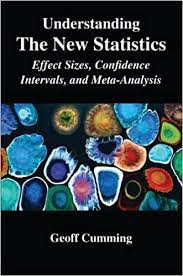

In [1]:
from IPython.display import Image
Image(filename = '003 - Cumming (2012).jpg') 

Um **intervalo de confiança** é um intervalo construído ao redor de uma estatística por meio de um procedimento que garante que, no longo prazo, após infinitas repetições sucessivas, garante que 95% dos intervalos capturarão o verdadeiro parâmetro populacional que se busca estimar. Note que a confiança **não está** na probabilidade de o parâmetro estar contido dentro do intervalo; afinal de contas, o parâmetro é fixo e estará (100%) ou não (0%) contido dentro do intervalo. Ao contrário disso, a confiança **está** na frequência relativa em longo prazo em que o **procedimento** pelo qual o intervalo é criado capturará o parâmetro. Assim, construindo-se 100 mil intervalos de confiança, espera-se que, no longo prazo, aproximadamente 95.000 deles capturem o parâmetro populacional.

Vejamos isso a seguir por meio de um exemplo. :)

In [2]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [5]:
# Definindo uma semente
np.random.seed(123)

# Definindo os parâmetros da nossa simulação
mu, sigma, N = 100, 15, 10 # média populacional, DP populacional, tamanho amostral
n_simulacoes = 100_000
capturou_mu = 0
t = 2.26 # valor t crítico para IC 95% com N = 10 (gl = 9)

for simulacao in range(0, n_simulacoes):

    # Gerando uma amostra
    amostra = np.random.normal(loc = mu, scale = sigma, size = N)

    # Média amostral
    media = np.mean(amostra)

    # DP amostral
    dp = np.std(amostra, ddof = 1)

    # Limite inferior do intervalo de confiança (IC_LI)
    IC_LI = media - t * (dp / (N ** 0.5))

    # Limite superior do intervalo de confiança (IC_LS)
    IC_LS = media + t * (dp / (N ** 0.5))

    # se mu está dentro do IC
    if IC_LI <= mu <= IC_LS:
        
        # incrementa o contador de vezes em que mu foi capturado
        capturou_mu += 1

# Imprimindo os resultados
print(f"""Após {n_simulacoes} simulações, {capturou_mu} delas tiveram ICs que incluíam o valor da média populacional,
totalizando {capturou_mu / n_simulacoes * 100:.3f}%, valor próximo ao nível de confiança de 95%.""")

Após 100000 simulações, 95033 delas tiveram ICs que incluíam o valor da média populacional,
totalizando 95.033%, valor próximo ao nível de confiança de 95%.


Note que o valor acima mostra que a frequência observada de ICs 95% que capturam a média populacional tende a 95% após um elevado número de simulações. Logo, a confiança de 95% é na frequência com que podemos esperar ter sucesso do processo gerador do IC em capturar o parâmetro populacional. A confiança informa algo sobre a frequência relativa no longo prazo. No estudo individual, um IC **capturará** ou **não capturará** o parâmetro populacional, embora possamos, por meio do raciocínio frequentista, estar confiantes que o nosso IC 95% particular tem 19/20 chances de ser um daqueles que capturam o parâmetro populacional.

In [6]:
# Repetindo a simulação anterior, mas agora para apenas 100 simulações
# Nessa simulação, impriremos os ICs de cada simulação e sinalizaremos aquelas que não contiverem
# o parâmetro populacional
# Também guardaremos os valores das simulações para posterior geração de um gráfico

import time
n_simulacoes = 100 # contador de simulações 
capturou_mu = 0 # número de simulações cujos ICs capturaram o parâmetro mu

# lista de valores para plotagem de gráficos
medias = list() # médias amostrais3
mdes = list() # margens de erro (i.e., IC 95% / 2)
cores = list() # cores dos gráficos

for simulacao in range(0, n_simulacoes):

    # Gerando uma amostra
    amostra = np.random.normal(loc = mu, scale = sigma, size = N)

    # Média amostral
    media = np.mean(amostra)

    # DP amostral
    dp = np.std(amostra, ddof = 1)

    # margem de erro (mde)
    mde = t * (dp / (N ** 0.5))

    # Limite inferior do intervalo de confiança (IC_LI)
    IC_LI = media - mde

    # Limite superior do intervalo de confiança (IC_LS)
    IC_LS = media + mde

    # Imprimindo o resultado de cada simulação
    print(f"Amostra {simulacao + 1}: M = {media:.3f}, IC 95% [{IC_LI:.3f}, {IC_LS:.3f}]")

    # a cor do IC será, por default...
    cor = "green"

    # mas se o IC falhar em capturar mu
    if not (IC_LI <= mu <= IC_LS):

        # Avisando quando o IC não capturou mu
        print("O IC não capturou a média populacional. =(")
        capturou_mu += 1

        # no entanto, se o IC não captura mu, a cor do IC será...
        cor = "red"

    # Guardando valores em uma lista
    medias.append(media)
    mdes.append(mde)
    cores.append(cor)

    time.sleep(0.5)

# Imprimindo os resultados finais
print(f"""Após {n_simulacoes} simulações, {capturou_mu} delas tiveram ICs que incluíam o valor da média populacional,
totalizando {capturou_mu / n_simulacoes * 100:.3f}%, valor próximo ao nível de confiança de 95%.""")


Amostra 1: M = 98.415, IC 95% [87.030, 109.800]
Amostra 2: M = 99.651, IC 95% [90.647, 108.655]
Amostra 3: M = 99.781, IC 95% [87.248, 112.314]
Amostra 4: M = 98.488, IC 95% [90.171, 106.805]
Amostra 5: M = 97.823, IC 95% [88.305, 107.341]
Amostra 6: M = 95.128, IC 95% [85.502, 104.754]
Amostra 7: M = 96.664, IC 95% [88.142, 105.186]
Amostra 8: M = 97.292, IC 95% [84.060, 110.524]
Amostra 9: M = 100.276, IC 95% [90.483, 110.069]
Amostra 10: M = 98.101, IC 95% [88.032, 108.169]
Amostra 11: M = 97.406, IC 95% [86.944, 107.867]
Amostra 12: M = 100.074, IC 95% [90.046, 110.102]
Amostra 13: M = 98.139, IC 95% [87.715, 108.564]
Amostra 14: M = 96.401, IC 95% [87.714, 105.088]
Amostra 15: M = 104.033, IC 95% [92.198, 115.868]
Amostra 16: M = 108.585, IC 95% [96.471, 120.700]
Amostra 17: M = 95.462, IC 95% [83.243, 107.681]
Amostra 18: M = 98.216, IC 95% [83.594, 112.839]
Amostra 19: M = 95.427, IC 95% [81.734, 109.121]
Amostra 20: M = 91.708, IC 95% [87.715, 95.700]
O IC não capturou a média 

A simulação acima teve um valor próximo a 95% dos ICs capturando a média populacional (se o número de simulações fosse mais elevado, mais ainda esse resultado tenderia a 95%). A mesma lógica se aplica a outros parâmetros de interesse que não a média.

Para finalizar, vamos ter uma intuição visual do que foi descrito na análise anterior. Vamos plotar os ICs em um gráfico.

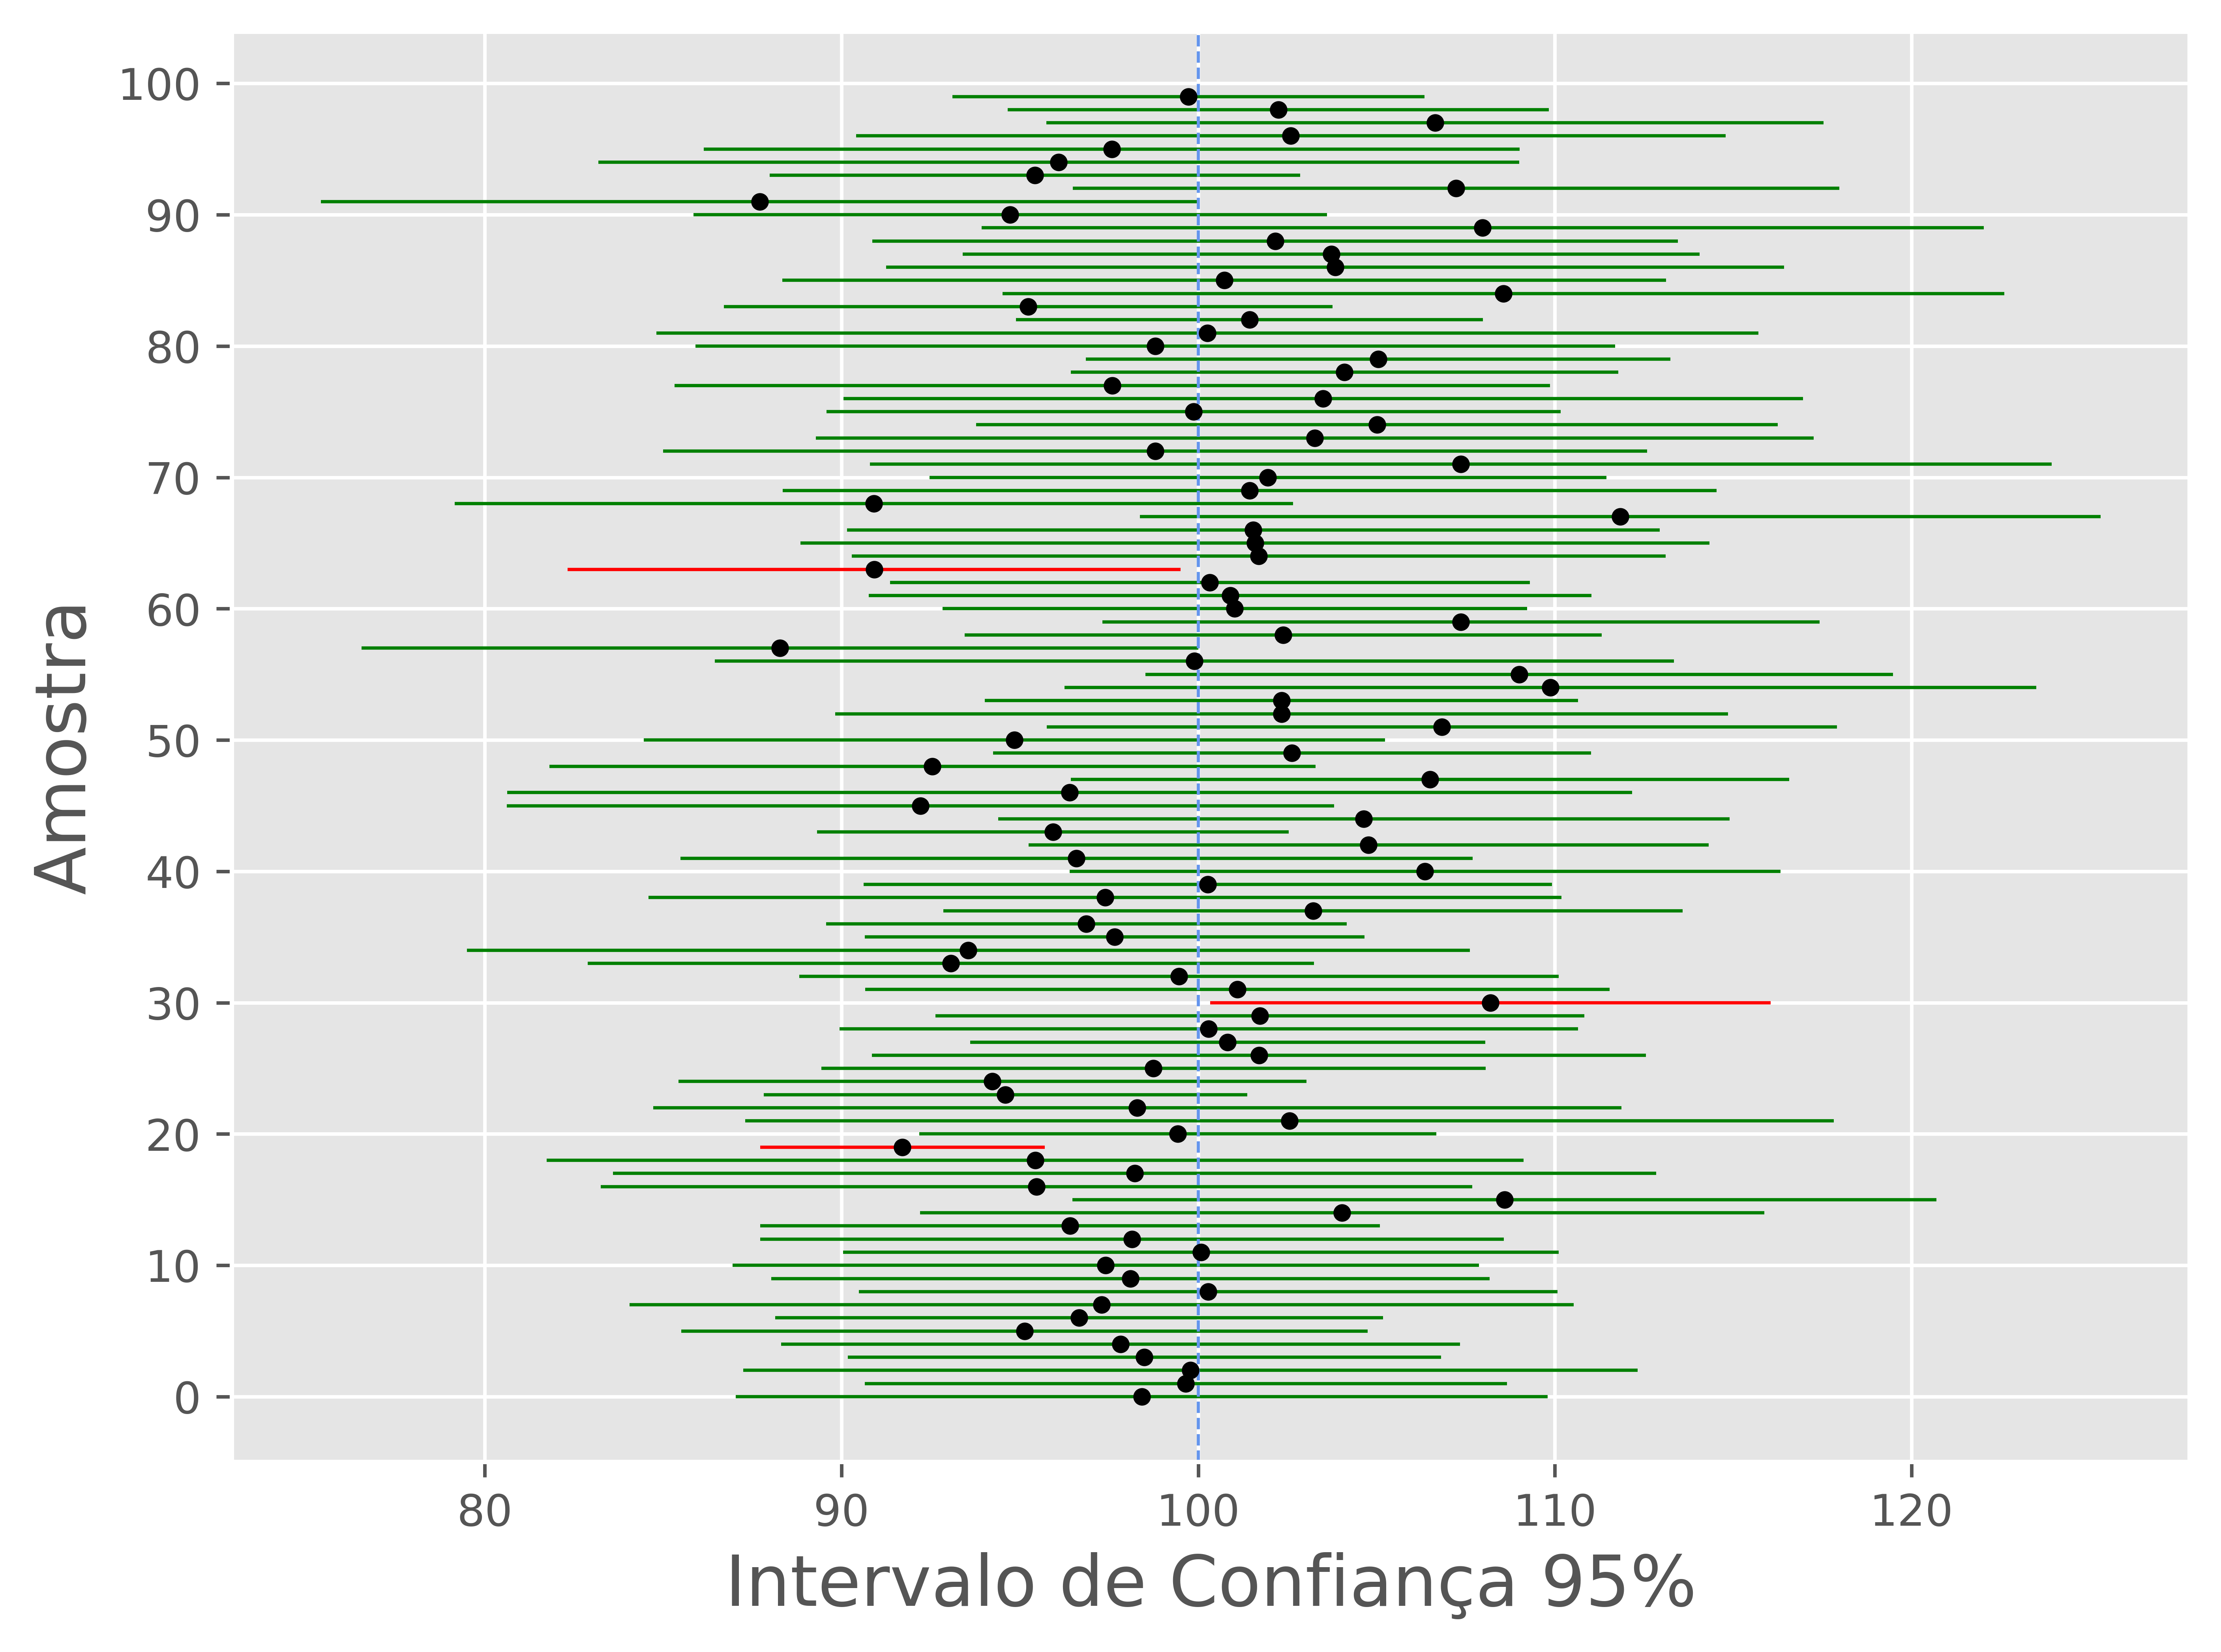

In [10]:
plt.style.use('ggplot')

# Valores de referência do eixo y
y = list(range(0, n_simulacoes * 1))

# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 800)

# Plotando ICs 95%
plt.errorbar(medias, y, xerr = mdes, elinewidth = 0.75, fmt = '.', ecolor = cores, color = "black")

# Linha de referência do parâmetro mu
plt.axvline(x = mu, linewidth = 0.7, color = 'cornflowerblue', ls = '--')

# Rótulos da figura
plt.xlabel("Intervalo de Confiança 95%", fontsize = 16)
plt.ylabel("Amostra", fontsize = 16)

# Bins do eixo y
plt.yticks(list(range(0, 110, 10))) # 0 a 100, em passos de 10

# Salvando o gráfico
plt.savefig('003 - Intervalos de confiança.jpg', dpi = 600, bbox_inches = "tight")

# Mostrando o gráfico
plt.show()

Agora, veremos o significado de nosso outro intervalo de interesse.

Um **intervalo de predição** é um intervalo construído de tal maneira que 95% dos valores futuros amostrados aleatoriamente estarão dentro dessa faixa de valores. Esse intervalo geralmente é baseado na distribuição normal padrão e nos escores *z* associados a diferentes distâncias da média 0 dessa distribuição.

Assim, construindo-se um intervalo de predição e, posteriormente, amostrando-se 100 mil intervalos de confiança, espera-se que, no longo prazo, aproximadamente 95.000 deles estejam dentro do intervalo de predição.

In [11]:
# Definindo os parâmetros da nossa simulação
mu, sigma = 100, 15 # média populacional, DP populacional
z = 1.96 # valor z aproximado associado a 95%
n_simulacoes = 100_000

# Limite inferior do intervalo de predição
IP_LI = 100 - 15 * z
IP_LS = 100 + 15 * z

# Variável contará quantos casos caíram dentro do IP 95%
valor_caiu_dentro_do_ip = 0

for simulacao in range(0, n_simulacoes):

    # Amostrando um caso
    observacao = np.random.normal(loc = mu, scale = sigma, size = 1)[0]

    # se a observação está dentro do IP 95%
    if IP_LI <= observacao <= IP_LS:
        
        # incrementa o contador de valores que caíram dentro do IP
        valor_caiu_dentro_do_ip += 1

# Imprimindo os resultados
print(f"""Após {n_simulacoes} simulações, {valor_caiu_dentro_do_ip} delas estavam dentro dos limites do IP 95% [{IP_LI:.3f}, {IP_LS:.3f}],
totalizando {valor_caiu_dentro_do_ip / n_simulacoes * 100:.3f}%, valor próximo ao previsto pelo IP 95%.""")

Após 100000 simulações, 94976 delas estavam dentro dos limites do IP 95% [70.600, 129.400],
totalizando 94.976%, valor próximo ao previsto pelo IP 95%.


In [12]:
# Repetindo a simulação anterior, mas agora para apenas 100 simulações
# Nessa simulação, impriremos os valores de cada simulação e sinalizaremos aquelas que
# caírem FORA dos limites do IP 95%
import time
valor_caiu_dentro_do_ip = 0
n_simulacoes = 100

# Definindo os parâmetros da nossa simulação
mu, sigma = 100, 15 # média populacional, DP populacional
z = 1.96 # valor z aproximado associado a 95%

# Limite inferior do intervalo de predição
IP_LI = 100 - 15 * z
IP_LS = 100 + 15 * z

for simulacao in range(0, n_simulacoes):

    # Gerando um caso
    observacao = np.random.normal(loc = mu, scale = sigma, size = 1)[0]

    # Imprimindo o resultado de cada simulação
    print(f"Observação {simulacao + 1}: {observacao:.3f}")

    # Se a observação está dentro do IP 95%
    if (IP_LI <= observacao <= IP_LS):

        print(f"YAAAY! A observação caiu dentro do IP 95% [{IP_LI:.3f}, {IP_LS:.3f}].")
        valor_caiu_dentro_do_ip += 1
        
    else:

        print(f"QUE PENAAA! =( A observação NÃO caiu dentro do IP 95% [{IP_LI:.3f}, {IP_LS:.3f}].")
        
    time.sleep(0.5)

# Imprimindo os resultados finais
print(f"""Após {n_simulacoes} simulações, {valor_caiu_dentro_do_ip} delas estavam dentro dos limites do IP 95% [{IP_LI:.3f}, {IP_LS:.3f}],
totalizando {valor_caiu_dentro_do_ip / n_simulacoes * 100:.3f}%, valor próximo ao previsto pelo IP 95%.""")




Observação 1: 120.681
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 2: 97.232
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 3: 120.795
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 4: 75.527
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 5: 96.523
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 6: 104.202
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 7: 103.502
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 8: 129.140
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 9: 128.249
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 10: 101.602
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 11: 104.789
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Observação 12: 107.288
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Obse

Observação 100: 92.028
YAAAY! A observação caiu dentro do IP 95% [70.600, 129.400].
Após 100 simulações, 99 delas estavam dentro dos limites do IP 95% [70.600, 129.400],
totalizando 99.000%, valor próximo ao previsto pelo IP 95%.


A simulação acima indicou que 99% das observações caíram dentro do intervalo de predição. No entanto, se aumentássemos o número de simulações (e.g., para 10 mil), provavelmente o percentual tenderia a 95%, tal como indicado pelo valor do IP.

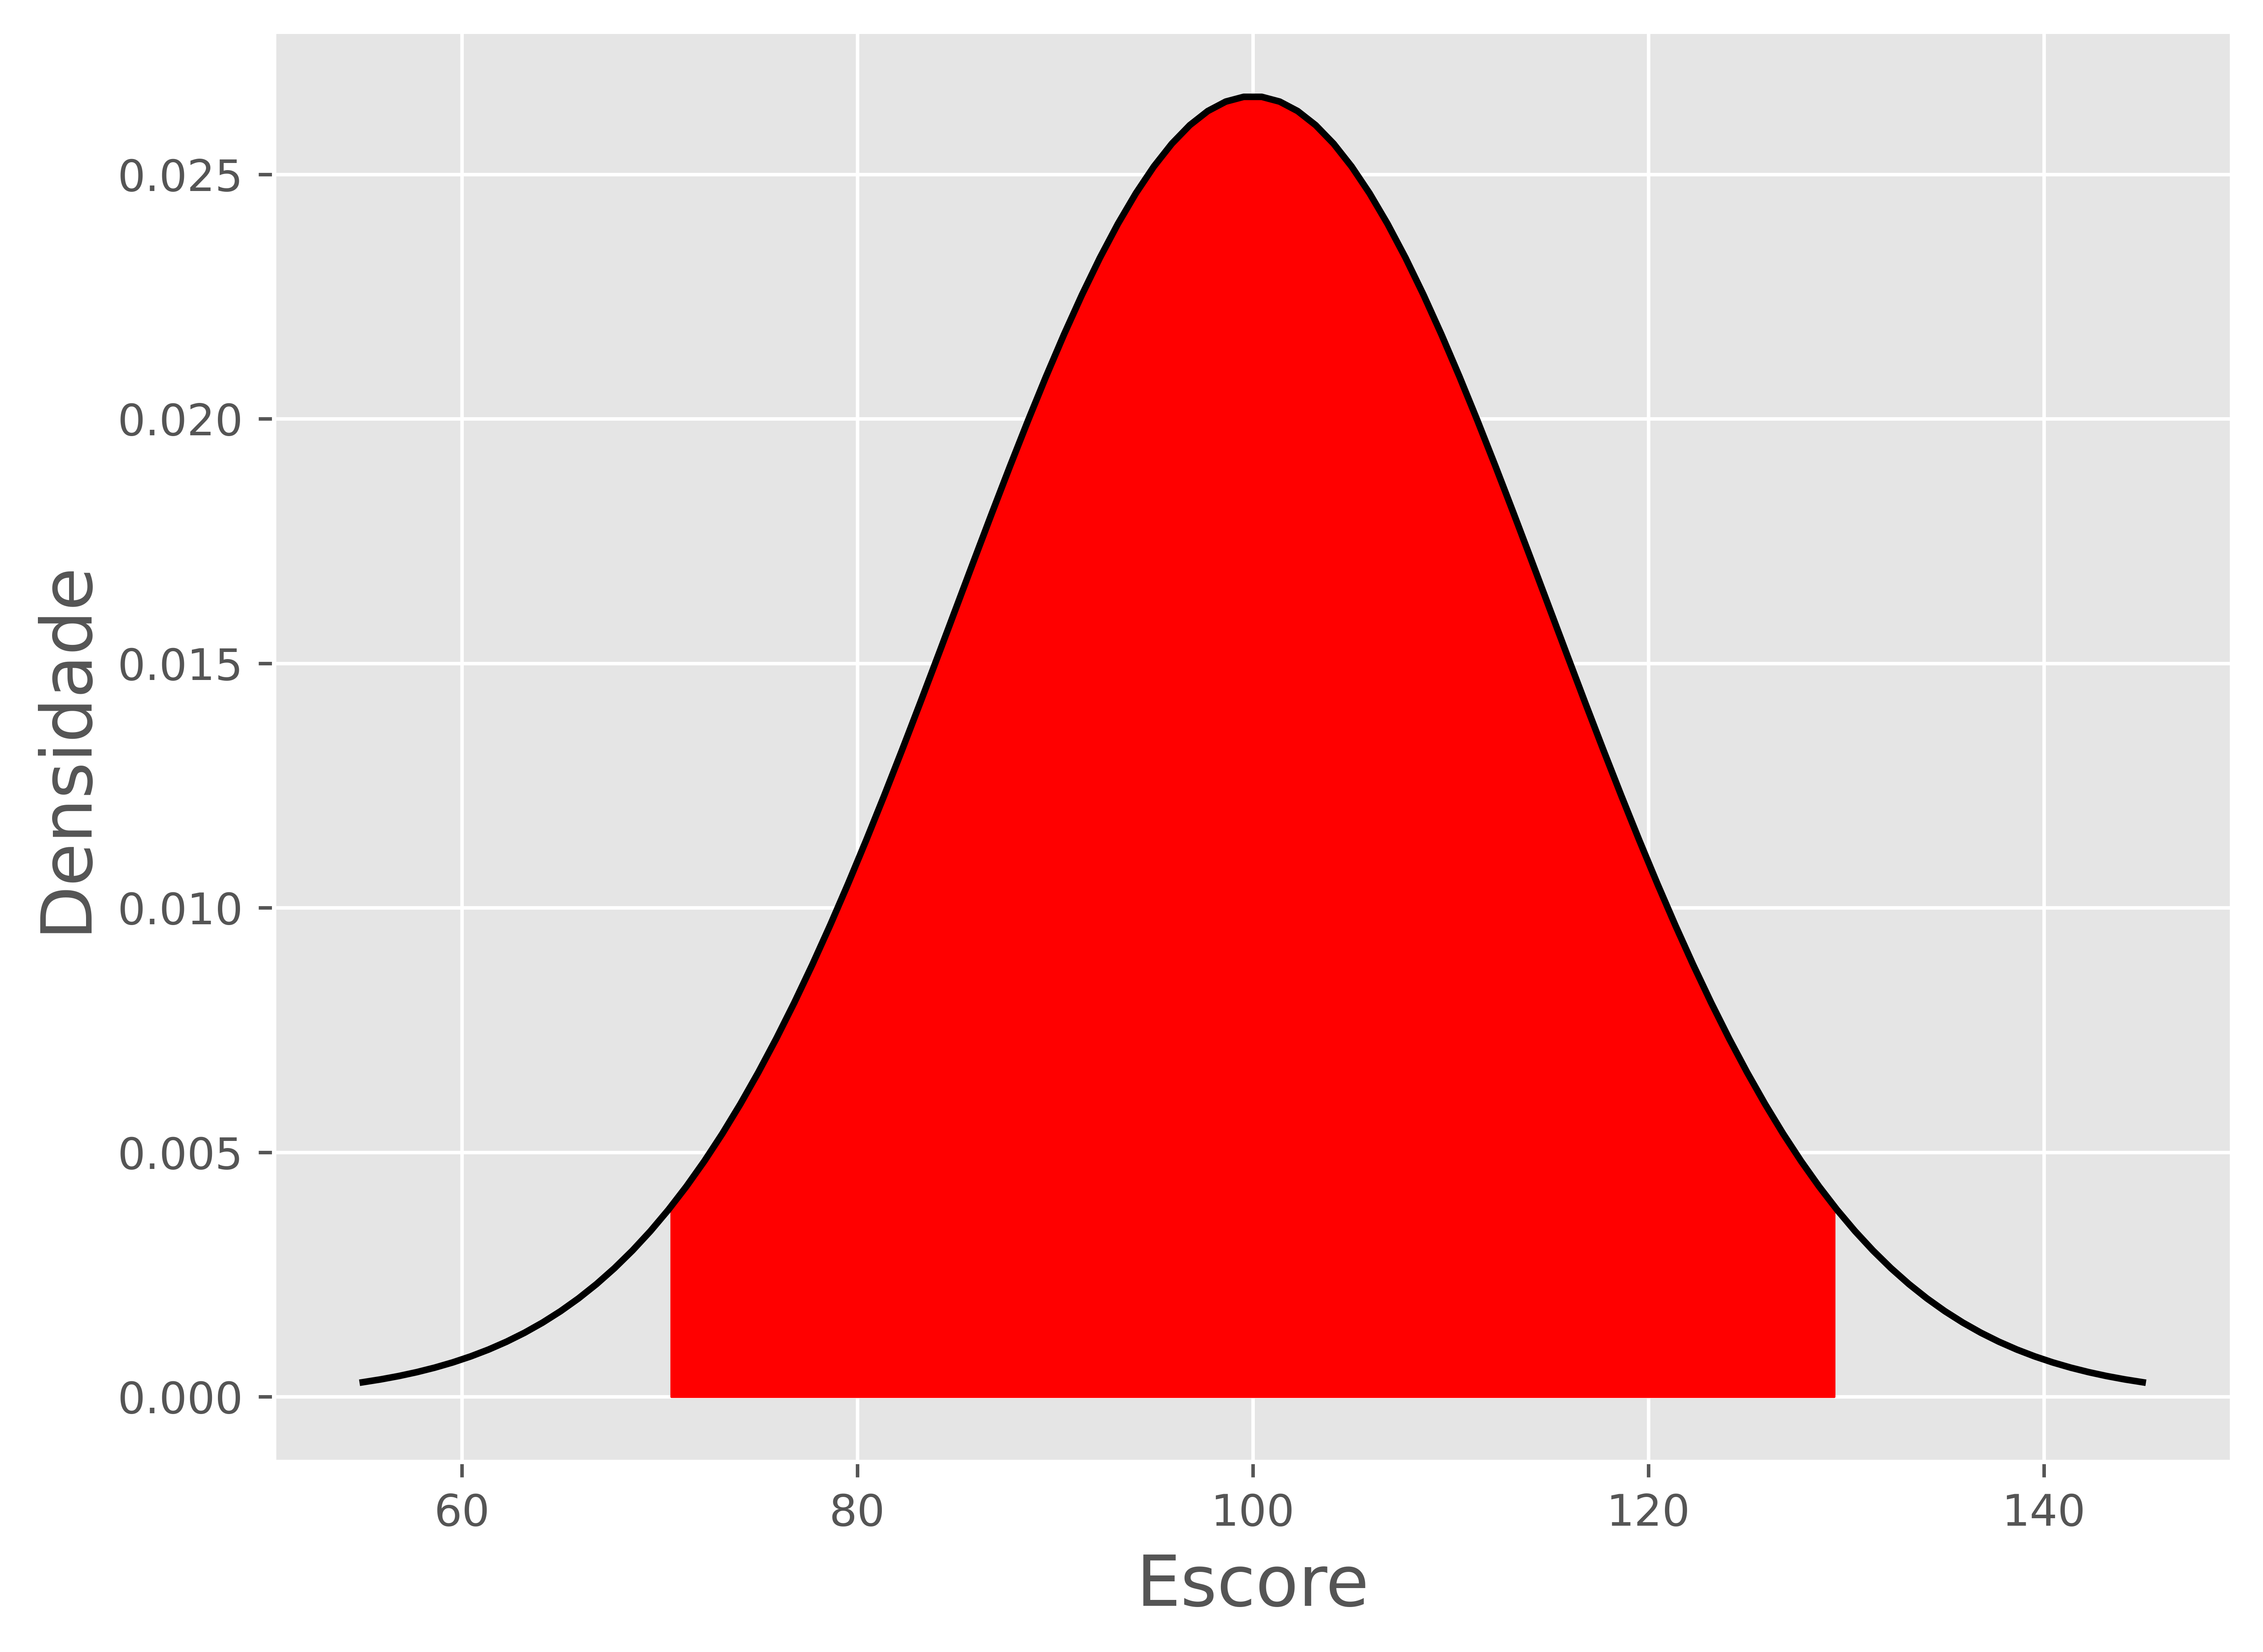

In [13]:
# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 800)

# Valores dos parâmetros
# (a redefinição aqui é apenas para fins didáticos; como os valores já foram previamente
# definidos, eles não precisariam novamente ser definidos agora.)
mu, sigma = 100, 15

# Valores do eixo x
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)

# Valores do eixo x dentro do intervalo de predição
x_ip = np.linspace(IP_LI, IP_LS, 100)

# Plotando o gráfico
# stats.norm.pdf: retorna a função densidade de probabilidade da distribuição normal
plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'black') 

# Intervalo de predição
plt.fill_between(x_ip, stats.norm.pdf(x_ip, mu, sigma), color = 'red')

# Rótulos dos eixos
plt.xlabel("Escore", fontsize = 16)
plt.ylabel("Densidade", fontsize = 16)

# Salvando o gráfico
plt.savefig('003 - Intervalo de predição.jpg', dpi = 600, bbox_inches = "tight")

# Mostrando o gráfico
plt.show()

Em síntese, no **intervalo de confiança**, temos confiança de 95% (ou de qualquer outro valor estabelecido) na frequência pela qual o processo gerador do intervalo capturará o parâmetro que ele busca estimar. O parâmetro é **fixo**, mas os limites do intervalo são variáveis de amostra para amostra. No **intervalo de predição**, temos 95% de confiança que uma estimativa aleatória futura de uma dada população cairá dentro dos limites desse intervalo. Os limites do intervalo são **fixos**, mas os valores das observações amostradas são **variáveis**.